<br>

- 원본 커널 : https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial

## Data Description

- In this competition, you will predict the `probability` that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\\Users\\user\\Desktop\\02\\train.csv')

In [ ]:
test = pd.read_csv('C:\\Users\\user\\Desktop\\02\\test.csv')
test.head()

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
rows = train.shape[0]
columns = train.shape[1]

print('학습 데이터셋은 {}개의 행 과 {}개의 열을 가지고 있다.'.format(rows, columns))

학습 데이터셋은 595212개의 행 과 59개의 열을 가지고 있다.


<br>

## 1. Data Quality checks

### Null or missing values check

In [9]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [6]:
# 두번 적용하면 모든 열에 대한 값을 출력
train.isnull().any().any()

False

In [7]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

In [11]:
len(train_copy.columns)

59

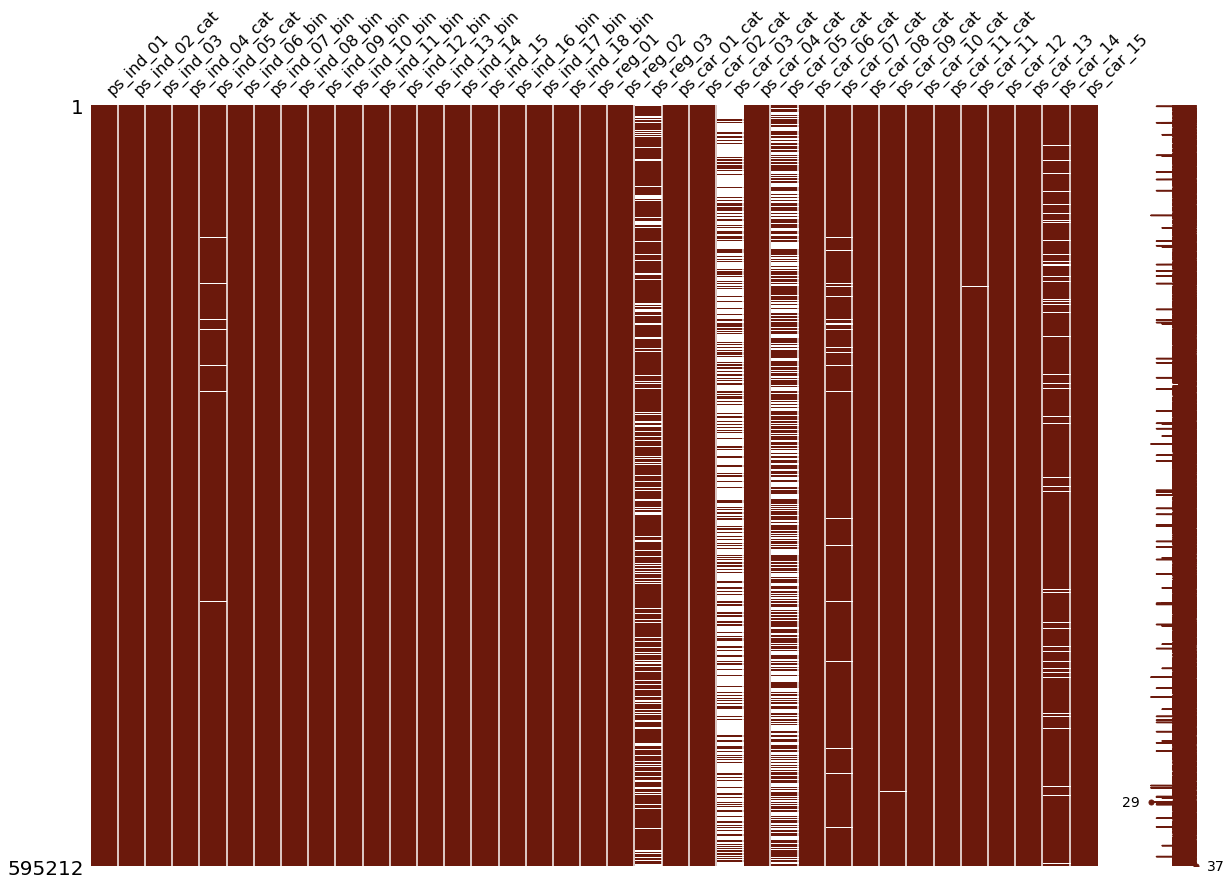

In [12]:
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize = (20, 14), color = (0.42, 0.1, 0.05))

<br>

### msno 추가

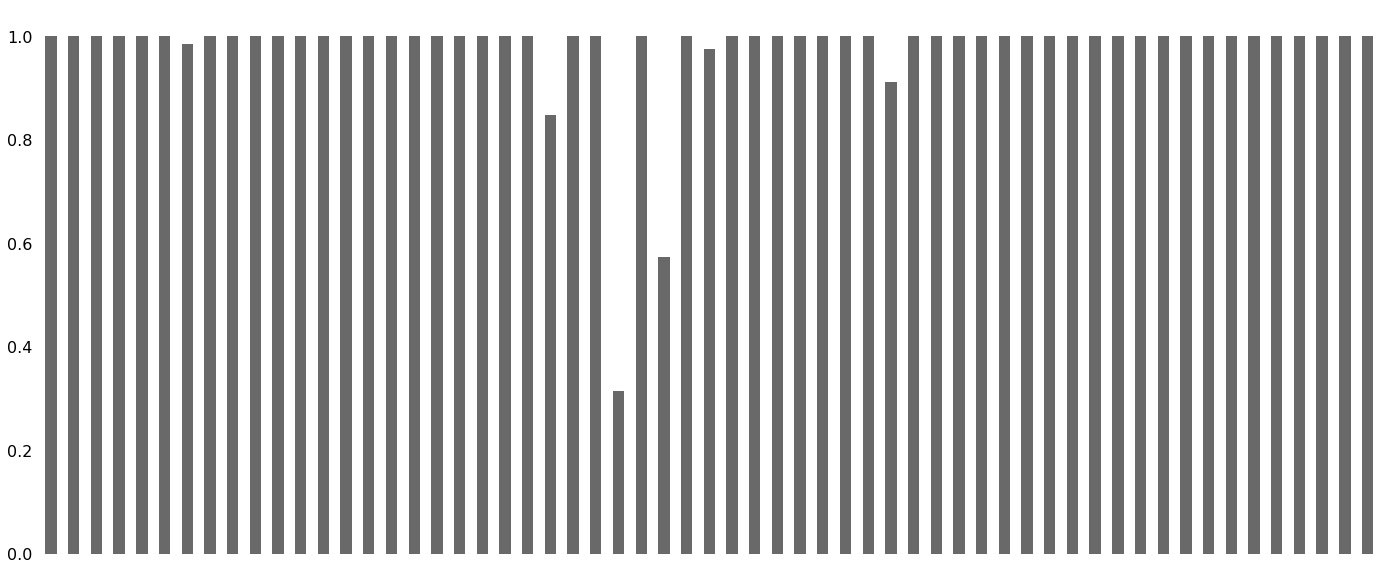

In [17]:
# msno.bar(train, log = True)

msno.bar(train_copy.sample(500))

# msno.bar(df_train) 

# df_train.sample(500) : 무작위로 500개 추출

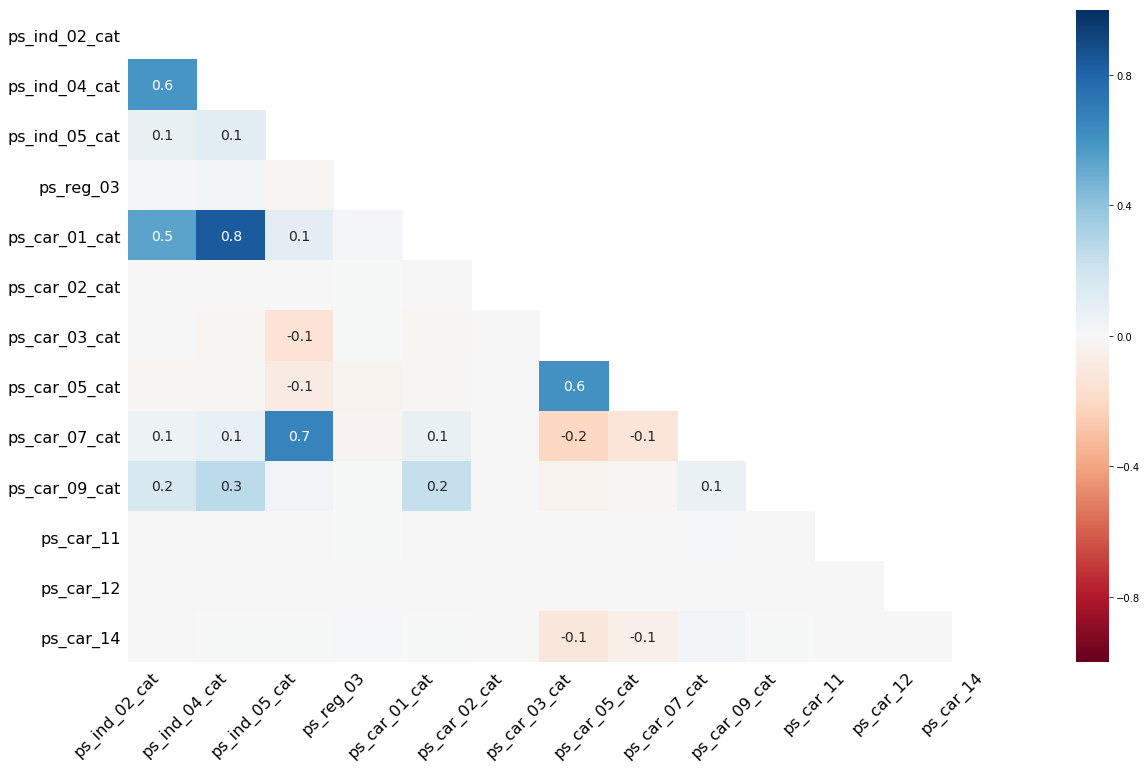

In [18]:
msno.heatmap(train_copy)

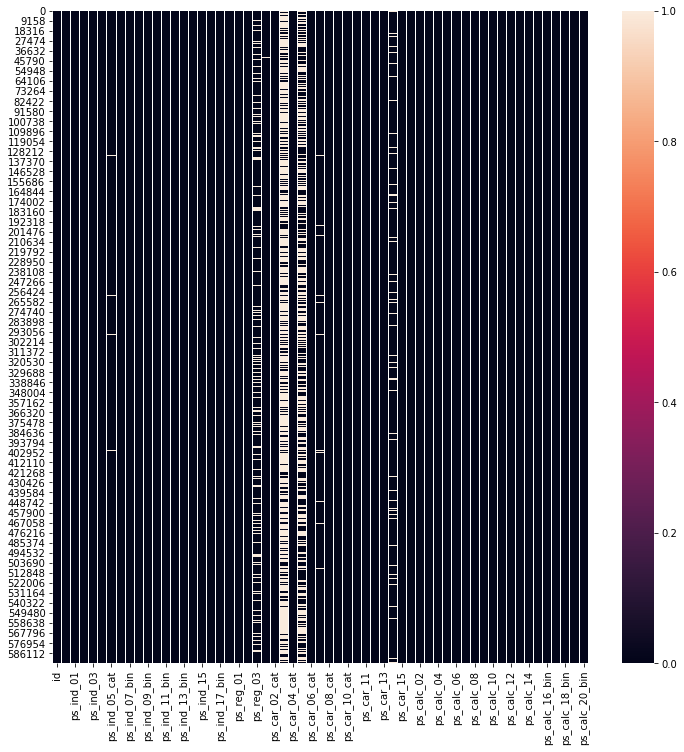

In [19]:
%matplotlib inline
plt.figure(figsize = (12,12))
sns.heatmap(train_copy.isnull(), cbar = True)


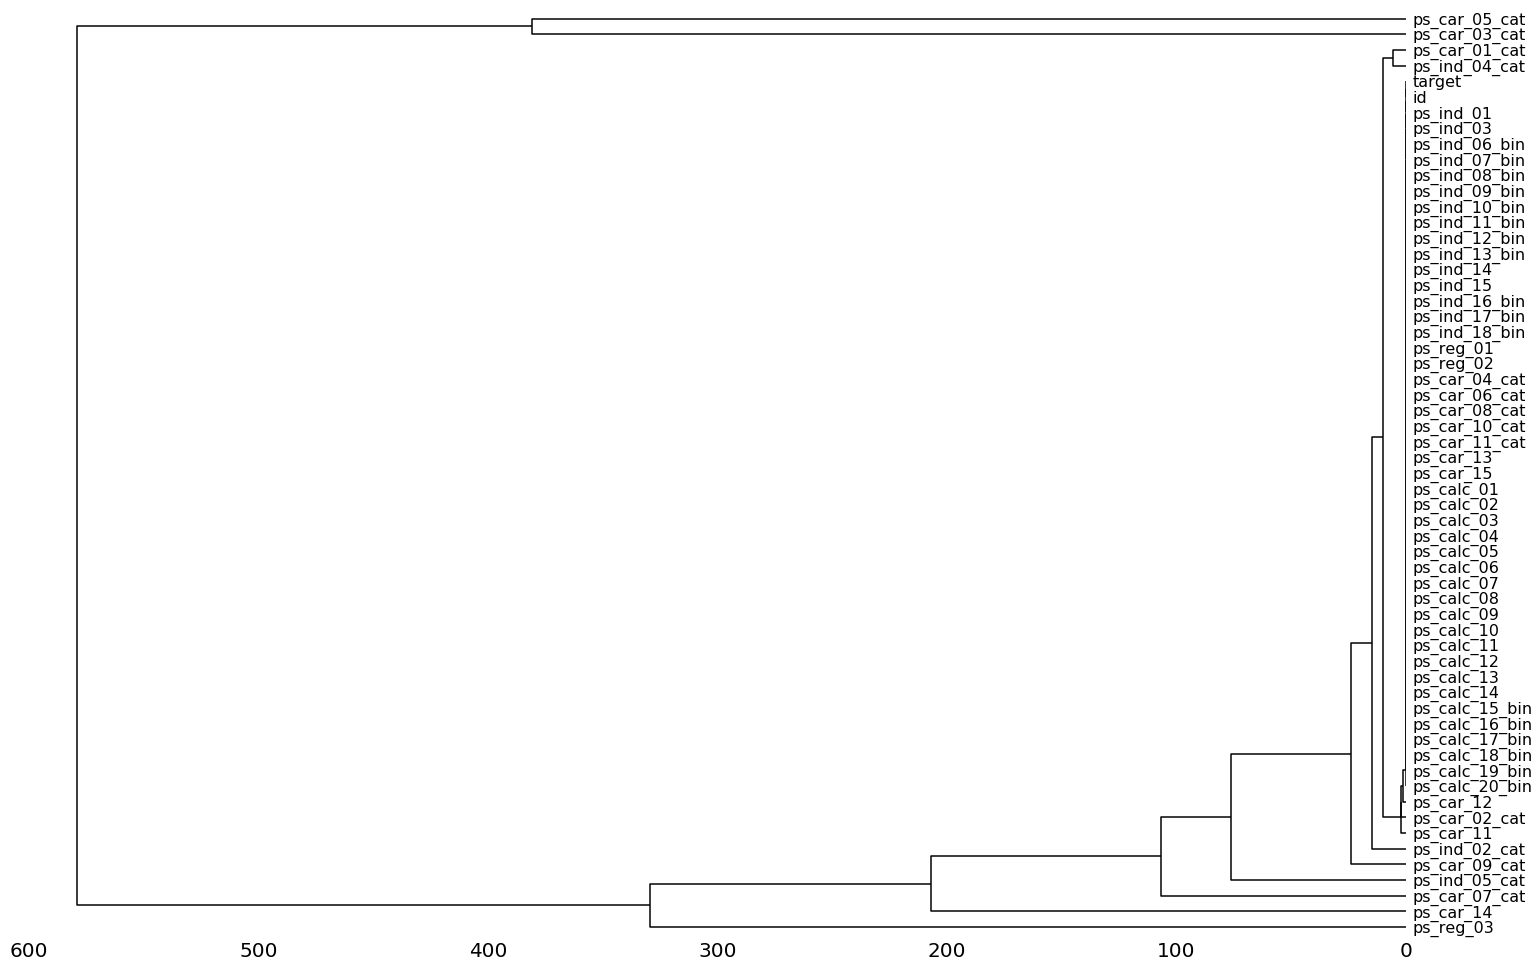

In [20]:
msno.dendrogram(train_copy)